In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
X, y, *_ = make_regression(
    n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50, random_state=42
)

In [3]:
df = pd.DataFrame({"feature1": X[:, 0], "feature2": X[:, 1], "target": y})
print(df.shape)
df.head()

(100, 3)


,feature1,feature2,target
0,-1.191303,0.656554,-22.779796
1,0.058209,-1.142970,-107.569629
2,0.586857,2.190456,201.122932
3,0.473238,-0.072829,1.480178
4,0.738467,0.171368,111.798503


<Axes: xlabel='feature2', ylabel='target'>

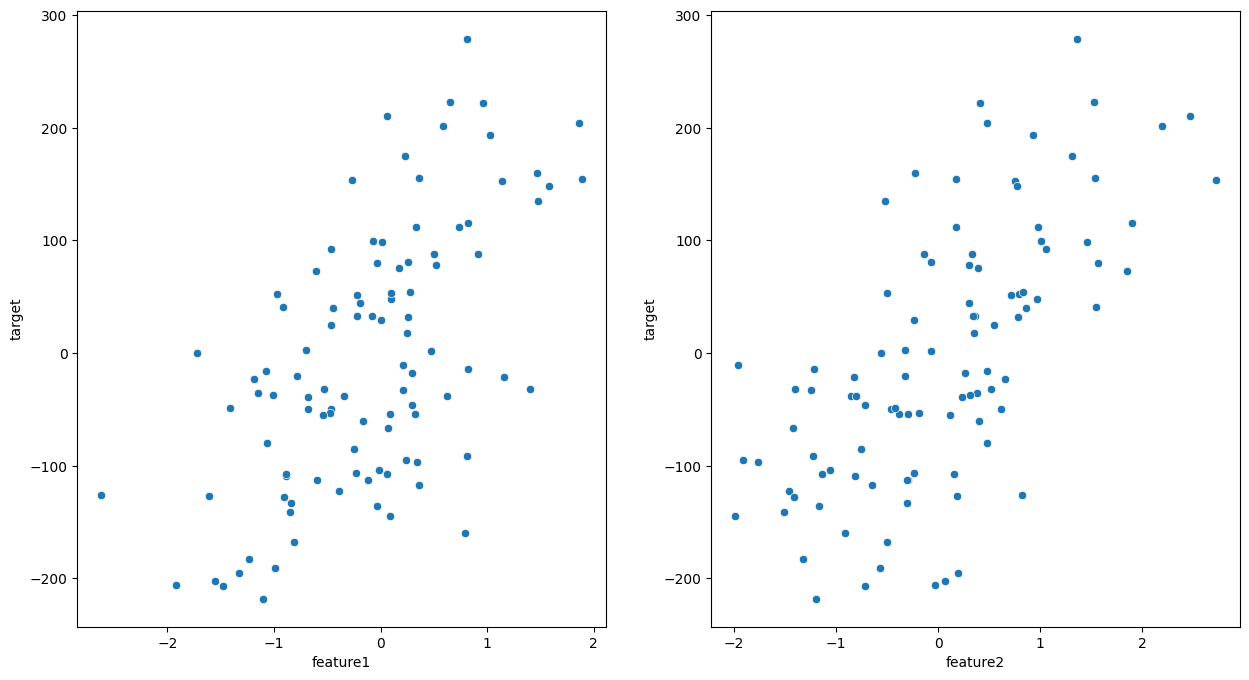

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(df, x="feature1", y="target", ax=ax1)
sns.scatterplot(df, x="feature2", y="target", ax=ax2)

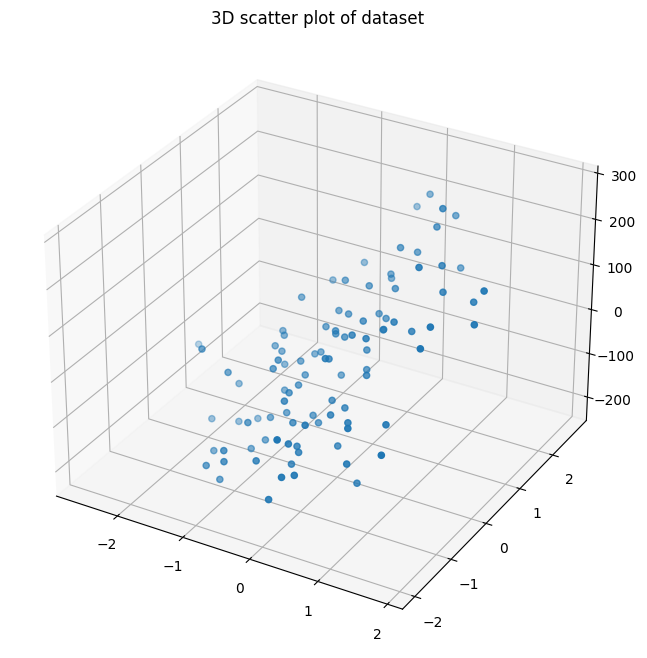

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

ax.scatter3D(df["feature1"], df["feature2"], df["target"])
ax.set_title("3D scatter plot of dataset")
plt.show()

In [6]:
fig = px.scatter_3d(df, x="feature1", y="feature2", z="target")
fig.show()

In [7]:
class MyMultipleLR:
    def __init__(self) -> None:
        self.coef_ = None
        self.intercept_ = None

    def fit_ols(self, X_train, y_train):
        """Impleamented in sklearn's LinearRegression class."""
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculating inverse of a matrix costs `O(n^3)` time
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def fit(self, X_train, y_train):
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        return {"intercept_": betas[0], "coef_": betas[1:]}

    def predict(self, X_test):
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError("First train the model using .fit() method.")

        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [9]:
lr = MyMultipleLR()
lr.fit_ols(X_train, y_train)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
lr.coef_

array([81.05675748, 72.39437821])

In [12]:
lr.intercept_

5.363809072090571

In [13]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 score", r2_score(y_test, y_pred))

MAE 47.08765781061961
MSE 3639.6081061143386
R2 score 0.6551211257640549
